7 对于cora数据集选择合适的数据挖掘算法，对该图数据集进行分类

In [98]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='./Cora/', name='Cora')

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)
        
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# print(data)
# print(data.test_mask)

model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
model.eval()
_, pred = model(data).max(dim=1)
correct = float (pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.8020


我是查到了一个叫做GCN的模型，然后cv了一下）

8 利用PCA降维对分类结果降维，并且二维可视化

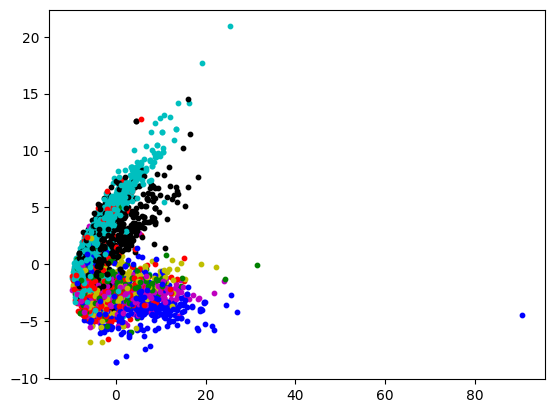

In [100]:
model.eval()
with torch.no_grad():
    res=model(data).cpu()
# print(res.shape)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=2,copy=True)
pca.fit(res)
reduced_x=pca.transform(res)
# print(res.shape)
# print(reduced_x.shape,data.y.shape)
# print(reduced_x)
# for x,y in reduced_x:
#     # print(x,y)
#     plt.scatter(x,y,c='r')
# plt.scatter(reduced_x[:,0],reduced_x[:,1],s=1)
colour=['r','g','b','c','k','m','y','w']
for i,(x,y) in enumerate(reduced_x):
    plt.scatter(x,y,c=colour[data.y[i]],s=10)
plt.show()